# Exploration of COVID-19 data source

The COVID-19 data source is available [here](https://github.com/owid/covid-19-data/tree/master/public/data). For an interactive experience, visit [Binder](https://mybinder.org/v2/gh/jitrapon/mads-milestone-i/main).

Credit: [How to integrate Binder](https://github.com/alan-turing-institute/the-turing-way/blob/main/workshops/boost-research-reproducibility-binder/workshop-presentations/zero-to-binder-python.md).

## Loading Covid Data

In [161]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from seaborn import FacetGrid

In [2]:
# read in the covid data
covid = pd.read_csv('data/owid-covid-data.csv')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [3]:
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [4]:
from pandas import DataFrame


def filter_country_vaccinations(df: DataFrame, country: str) -> DataFrame:
    """
    Given the covid dataframe, returns a new dataframe with only the vaccination data for the specified country
    :param df: The original covid dataframe
    :param country: The name of the country to filter
    :return: A new dataframe
    """
    country_df = df[df['location'] == country]
    country_df['date'] = pd.to_datetime(country_df['date'])
    country_df.fillna(0, inplace=True)
    return country_df[['date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
                       'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                       'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million',
                       'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred']]

In [5]:
covid_us = filter_country_vaccinations(covid, 'United States')
covid_th = filter_country_vaccinations(covid, 'Thailand')
covid_us.tail(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred
145725,2022-01-05,517246098.0,246246794.0,205729958.0,74025924.0,1230032.0,875962.0,155.79,74.17,61.97,22.30,2638.0,251176.0,0.076
145726,2022-01-06,518397714.0,246561964.0,205896234.0,74698923.0,1151616.0,839923.0,156.14,74.26,62.02,22.50,2530.0,239458.0,0.072
145727,2022-01-07,519227706.0,246780227.0,206023108.0,75185888.0,829992.0,878428.0,156.39,74.33,62.05,22.65,2646.0,247864.0,0.075
145728,2022-01-08,519335421.0,246812938.0,206046093.0,75237089.0,107715.0,880983.0,156.42,74.34,62.06,22.66,2653.0,248053.0,0.075
145729,2022-01-09,519335422.0,246812939.0,206046093.0,75237089.0,1.0,813888.0,156.42,74.34,62.06,22.66,2451.0,228428.0,0.069


## Visualizing Vaccination Data by Country

In [6]:
def set_plot_theme():
    """
    Sets the default plot style for all the plots
    """
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params, font_scale=1.2)


set_plot_theme()

In [7]:
def filter_valid_vaccinations(df: DataFrame) -> DataFrame:
    """
    Creates a new dataframe with only the vaccination data of ['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated].
    Drops all rows that have zero values.
    :param df: The original dataframe
    :return: The new dataframe with only the vaccination data
    """
    df = df[['date', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']]
    df = df[~df[['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].eq(0).all(axis=1)]
    return df

In [8]:
def melt_by_date(df: DataFrame) -> DataFrame:
    """
    Melts the dataframe so that it is ready for multi-variable visualization
    :param df: The dataframe to melt
    :return: The new melted dataframe
    """
    return df.melt(id_vars=['date'])

In [9]:
def plot_vaccination(df: DataFrame, title, y_label='Percentage', legend_title='% of population',
                     legend_texts=['Total', 'At least 1 dose', 'Fully vaccinated'], x_label='Date', width=20,
                     height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    ax.set_ylabels(y_label)
    ax.set_xlabels(x_label)
    ax._legend.set_title(legend_title)
    for i, text in enumerate(legend_texts):
        ax._legend.texts[i].set_text(text)
    return ax

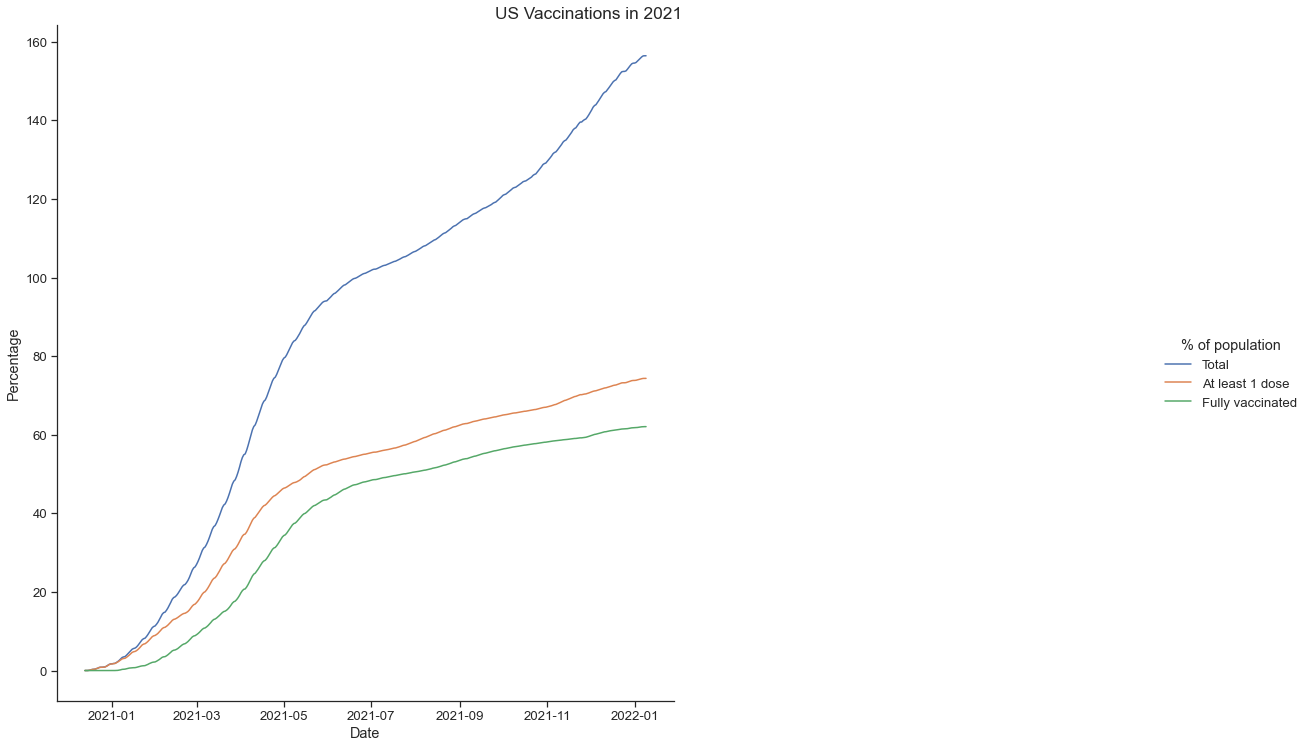

In [10]:
plot_vaccination(melt_by_date(filter_valid_vaccinations(covid_us)), 'US Vaccinations in 2021')

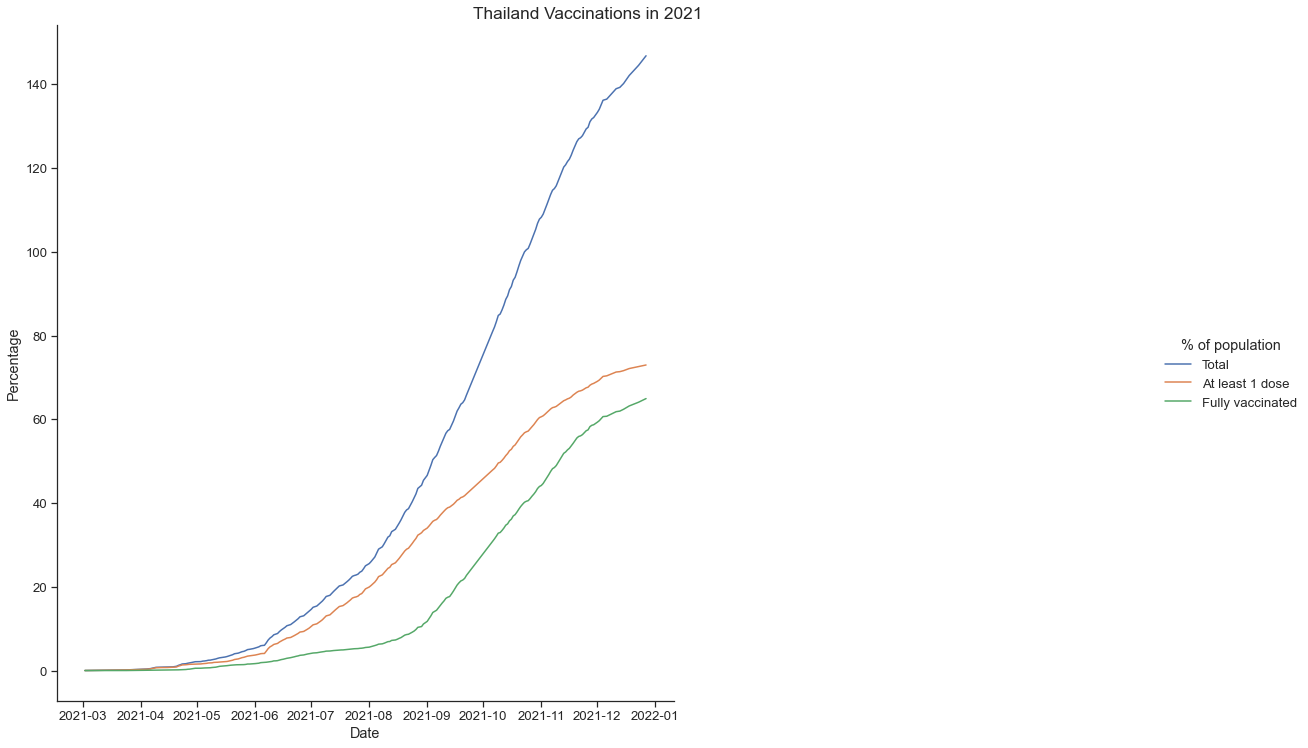

In [11]:
plot_vaccination(melt_by_date(filter_valid_vaccinations(covid_th)), 'Thailand Vaccinations in 2021')

## Visualizing Confirmed Case by Country

In [12]:
def filter_country_cases(df: DataFrame, country: str) -> DataFrame:
    """
    Filters the columns for cases by the specified country.
    :param df: The original covid dataframe
    :param country: The country to filter
    :return: The new filtered dataframe
    """
    country_df = df[df['location'] == country]
    country_df['date'] = pd.to_datetime(country_df['date'])
    country_df.fillna(0, inplace=True)
    return country_df[
        ['date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million',
         'new_cases_smoothed_per_million', 'positive_rate']]

In [13]:
covid_case_us = filter_country_cases(covid, 'United States')
covid_case_th = filter_country_cases(covid, 'Thailand')
covid_case_us.tail(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,positive_rate
145725,2022-01-05,57700873.0,623308.0,574507.571,173320.097,1872.273,1725.688,0.0
145726,2022-01-06,58487697.0,786824.0,602547.143,175683.535,2363.438,1809.912,0.0
145727,2022-01-07,59388529.0,900832.0,663735.286,178389.426,2705.891,1993.708,0.0
145728,2022-01-08,59767221.0,378692.0,701199.571,179526.929,1137.503,2106.242,0.0
145729,2022-01-09,60074429.0,307208.0,709633.000,180449.711,922.782,2131.574,0.0


In [14]:
def plot_cases(df: DataFrame, title, y_label='New Cases', x_label='Date', width=20, height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="new_cases_smoothed", kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    ax.set_ylabels(y_label)
    ax.set_xlabels(x_label)
    return ax

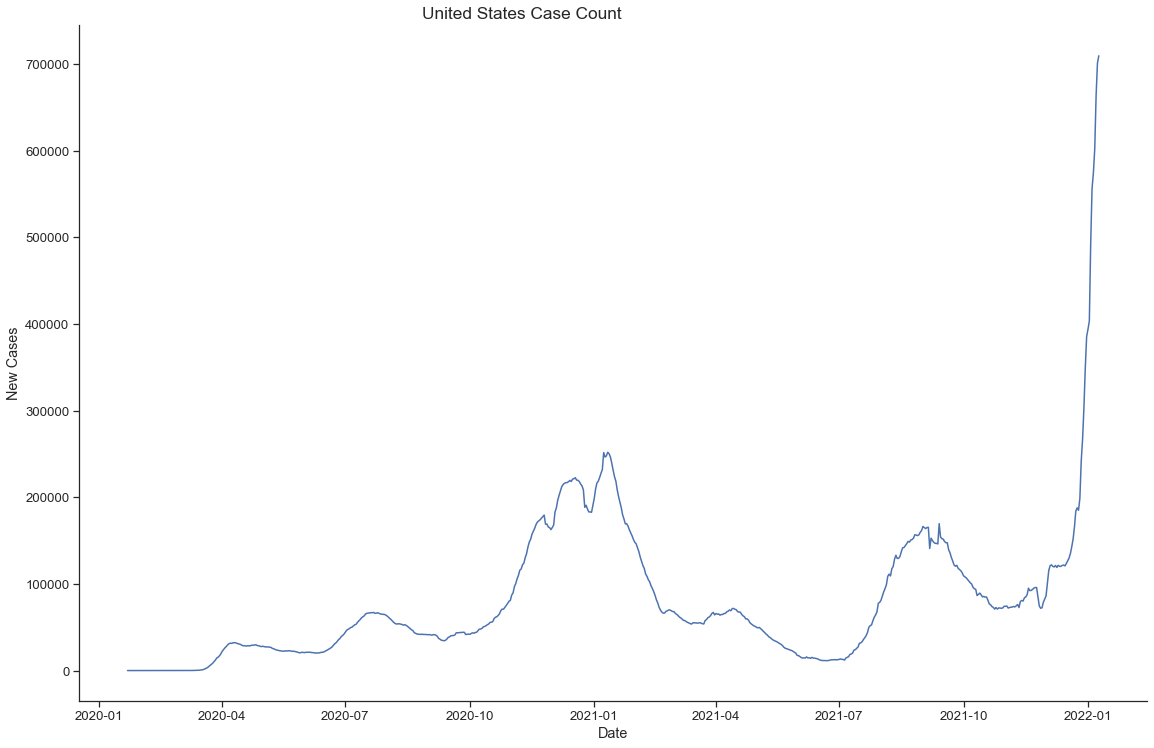

In [15]:
plot_cases(covid_case_us, 'United States Case Count')

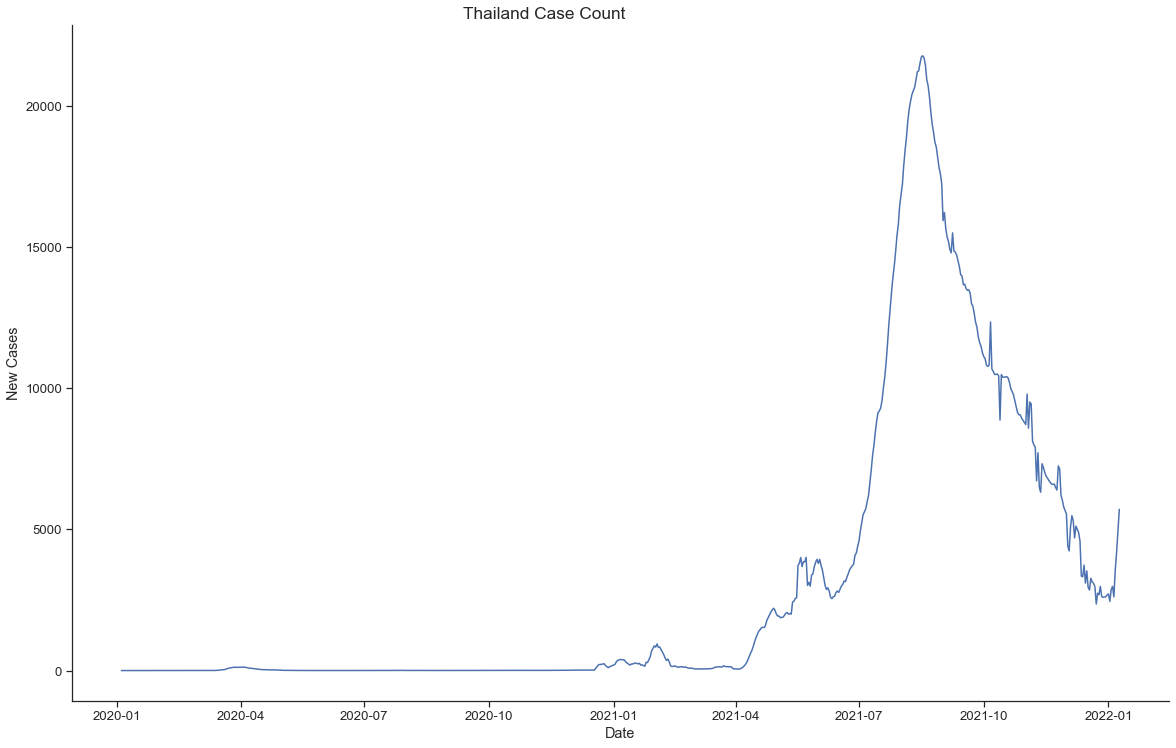

In [16]:
plot_cases(covid_case_th, 'Thailand Case Count')

## Visualizing Thailand's Travel Demand by Search Keyword Trends

In [17]:
def read_search_trend_csv(csv: str) -> DataFrame:
    df = pd.read_csv(csv, skiprows=2)
    df['Week'] = pd.to_datetime(df['Week'])
    df.columns = ['date', 'interest']
    return df

In [18]:
def read_search_trend_csvs(files: [str], cols: [str]) -> DataFrame:
    """
    Reads and merges multiple csv files specified into a dataframe
    :param cols: A list of column names
    :param files: The list of strings of file names
    :return: The dataframe
    """
    if len(files) == 0:
        raise ValueError('files must not be empty')
    df = read_search_trend_csv(files[0])
    for i in range(1, len(files)):
        df = pd.merge(df, read_search_trend_csv(files[i]), on='date')
    columns = ['date']
    columns.extend(cols)
    df.columns = columns
    return df


search_trend_th = read_search_trend_csvs(
    ['data/search-th-agoda.csv', 'data/search-th-huahin.csv', 'data/search-th-rent-car.csv'],
    ['agoda', 'huahin', 'car_rental'])
search_trend_th.sample(5)

,date,agoda,huahin,car_rental
37,2021-09-19,41,68,48
3,2021-01-24,33,43,38
20,2021-05-23,19,34,33
43,2021-10-31,70,66,78
48,2021-12-05,85,79,90


In [19]:
def plot_search_trend(df: DataFrame, title, y_label='Interest', x_label='Date', width=20, height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', data=df, kind='line')
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    ax.set_ylabels(y_label)
    ax.set_xlabels(x_label)
    ax._legend.set_title('Search Keyword')
    return ax

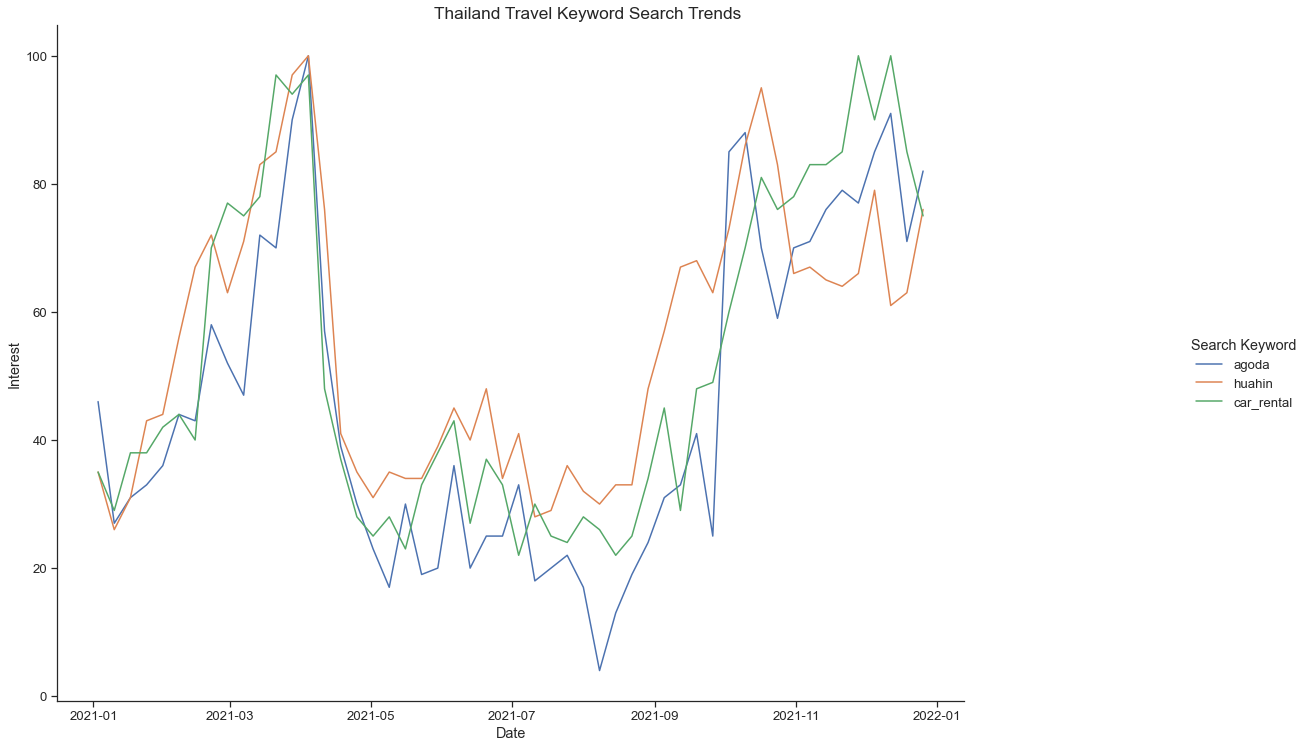

In [20]:
plot_search_trend(melt_by_date(search_trend_th), 'Thailand Travel Keyword Search Trends')

In [21]:
def min_max_normalize(x):
    """
    Apply the min-max normalization to the column x
    """
    return (x - x.min()) / (x.max() - x.min())

In [22]:
def normalize_search_trend(df: DataFrame) -> DataFrame:
    """
    Min-max normalization of the search trend
    """
    df_norm = df.iloc[:, 1:].apply(min_max_normalize, axis=0)
    df_norm['date'] = df['date']
    df_norm = df_norm.set_index('date')
    df_norm = df_norm.asfreq('D')
    df_norm = df_norm.interpolate()
    return df_norm.reset_index()


search_trend_norm_th = normalize_search_trend(search_trend_th)
# plot_search_trend(melt_by_date(search_trend_norm_th), 'Thailand Travel Keyword Search Trends', 'Interest (Normalized)')

In [23]:
def normalize_vaccinations(df: DataFrame) -> DataFrame:
    """
    Min-max normalization of the vaccination percentage
    """
    norm = df.iloc[:, 1:].apply(min_max_normalize)
    norm['date'] = df['date']
    mask = (norm['date'] >= pd.Timestamp('2021-01-01')) & (norm['date'] <= pd.Timestamp('2021-12-31'))
    norm = norm[mask]
    return norm


covid_vac_norm_th = normalize_vaccinations(filter_valid_vaccinations(covid_th))
# plot_vaccination(melt_by_date(covid_vac_norm_th), 'Thailand Vaccination')

In [24]:
def normalize_cases(df: DataFrame) -> DataFrame:
    """
    Min-max normalization of the cases
    """
    norm = df[['date', 'new_cases_smoothed']]
    norm = norm.iloc[:, 1:].apply(min_max_normalize, axis=0)
    norm['date'] = df['date']
    mask = (norm['date'] >= pd.Timestamp('2021-01-01')) & (norm['date'] <= pd.Timestamp('2021-12-31'))
    norm = norm[mask]
    return norm


covid_case_norm_th = normalize_cases(covid_case_th)
# plot_cases(covid_case_norm_th, 'Thailand New Cases')

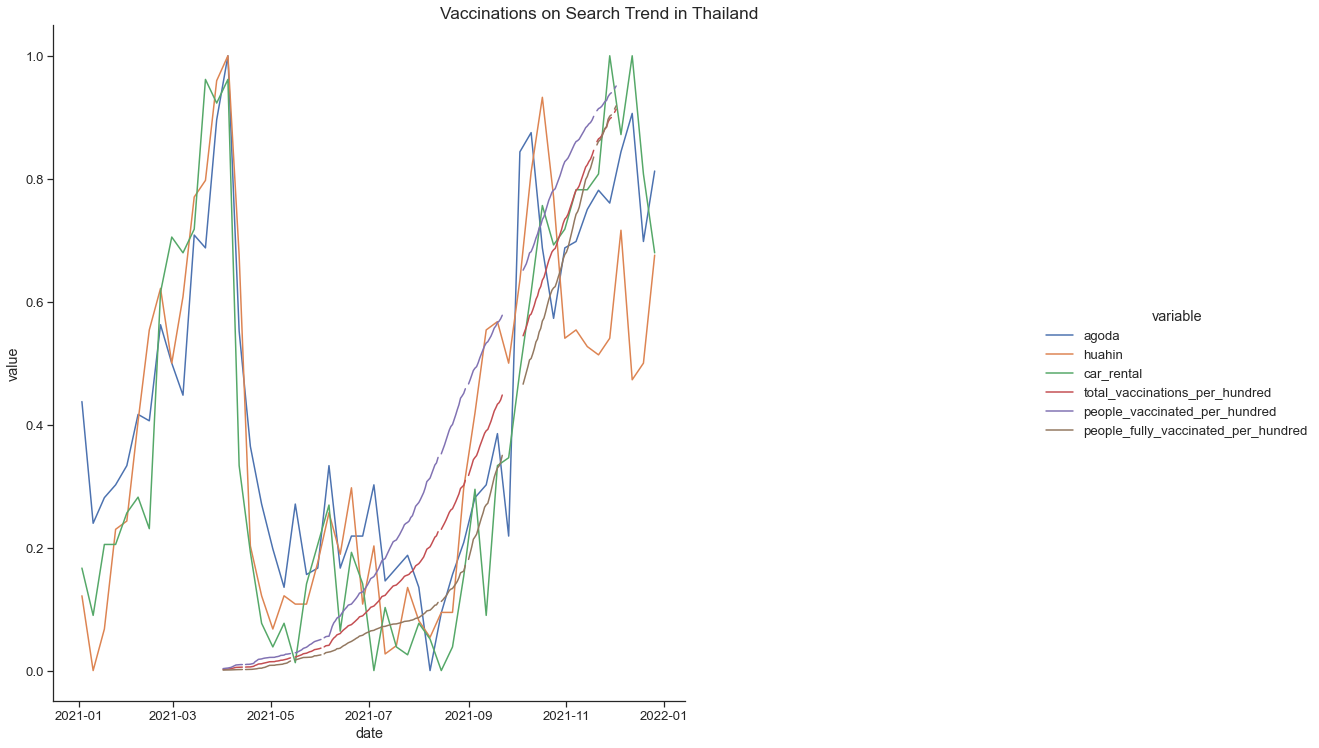

In [25]:
def plot_combined(df: DataFrame, title, width=20, height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    return ax


merged = pd.merge(search_trend_norm_th, covid_vac_norm_th, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
# merged = merged.interpolate()
plot_combined(merged, 'Vaccinations on Search Trend in Thailand')

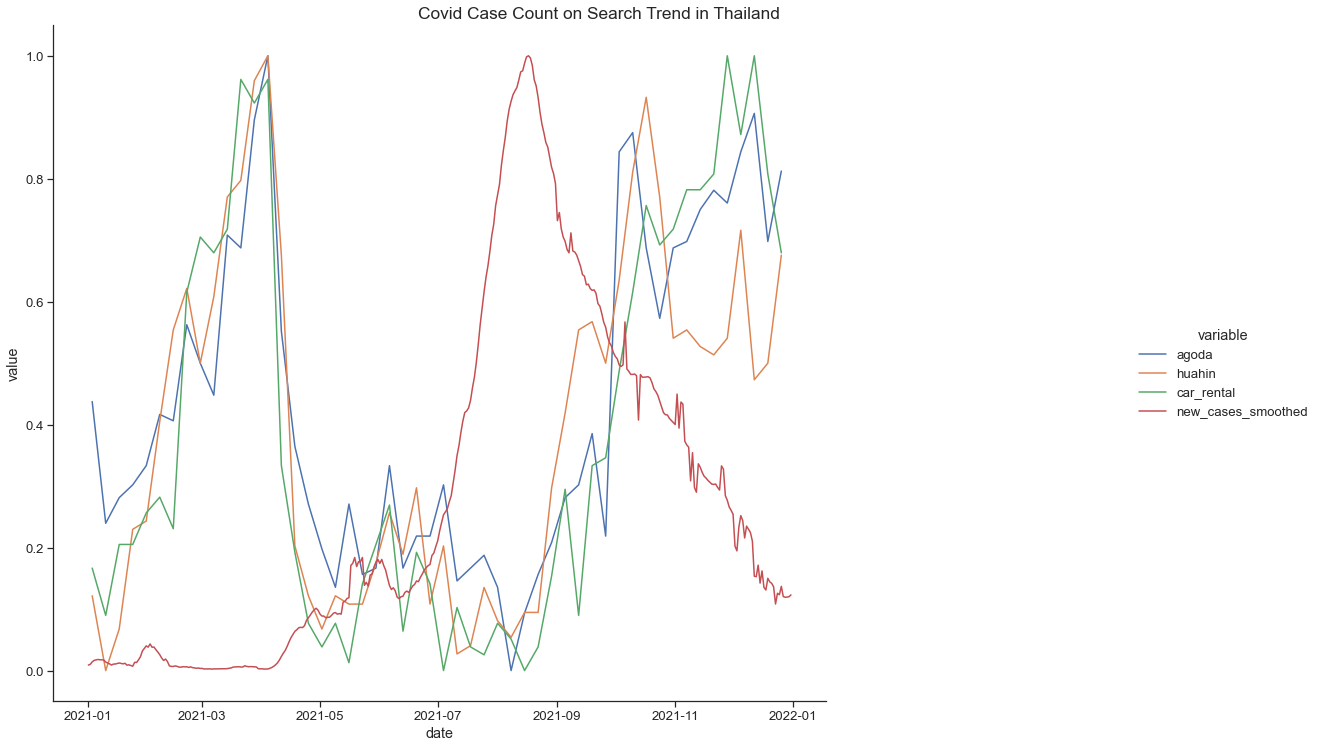

In [26]:
merged = pd.merge(search_trend_norm_th, covid_case_norm_th, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
plot_combined(merged, 'Covid Case Count on Search Trend in Thailand')

## Visualizing US Travel Demand By Search Keyword Trends

In [27]:
search_trend_us = read_search_trend_csvs(
    ['data/search-us-expedia.csv', 'data/search-us-flights.csv', 'data/search-us-hotels.csv',
     'data/search-us-travelocity.csv'], ['expedia', 'flights', 'hotels', 'travelocity'])
search_trend_us.sample(5)

,date,expedia,flights,hotels,travelocity
17,2021-05-02,84,90,94,70
24,2021-06-20,97,99,95,100
30,2021-08-01,77,89,86,68
40,2021-10-10,48,76,63,90
7,2021-02-21,67,74,55,64


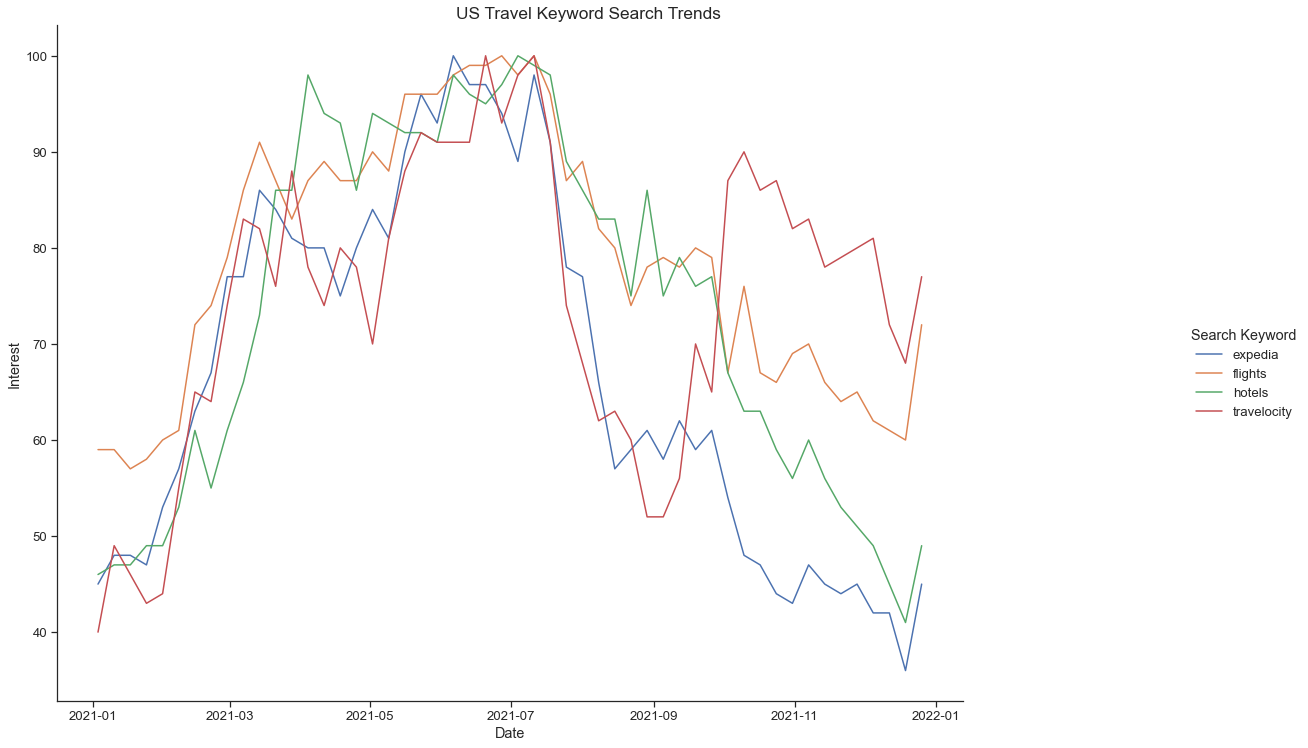

In [28]:
plot_search_trend(melt_by_date(search_trend_us), 'US Travel Keyword Search Trends')

In [29]:
# normalize all data
search_trend_norm_us = normalize_search_trend(search_trend_us)
covid_vac_norm_us = normalize_vaccinations(filter_valid_vaccinations(covid_us))
covid_case_norm_us = normalize_cases(covid_case_us)

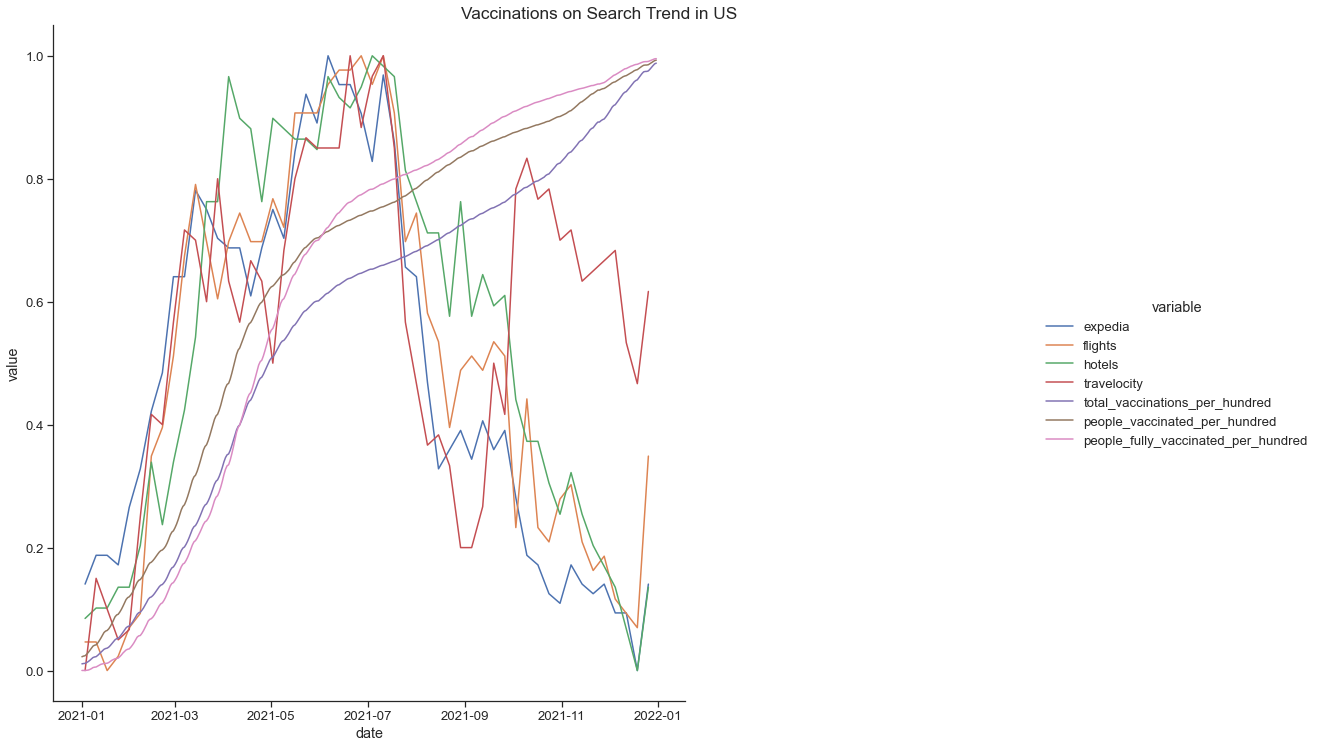

In [30]:
merged = pd.merge(search_trend_norm_us, covid_vac_norm_us, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
# merged = merged.interpolate()
plot_combined(merged, 'Vaccinations on Search Trend in US')

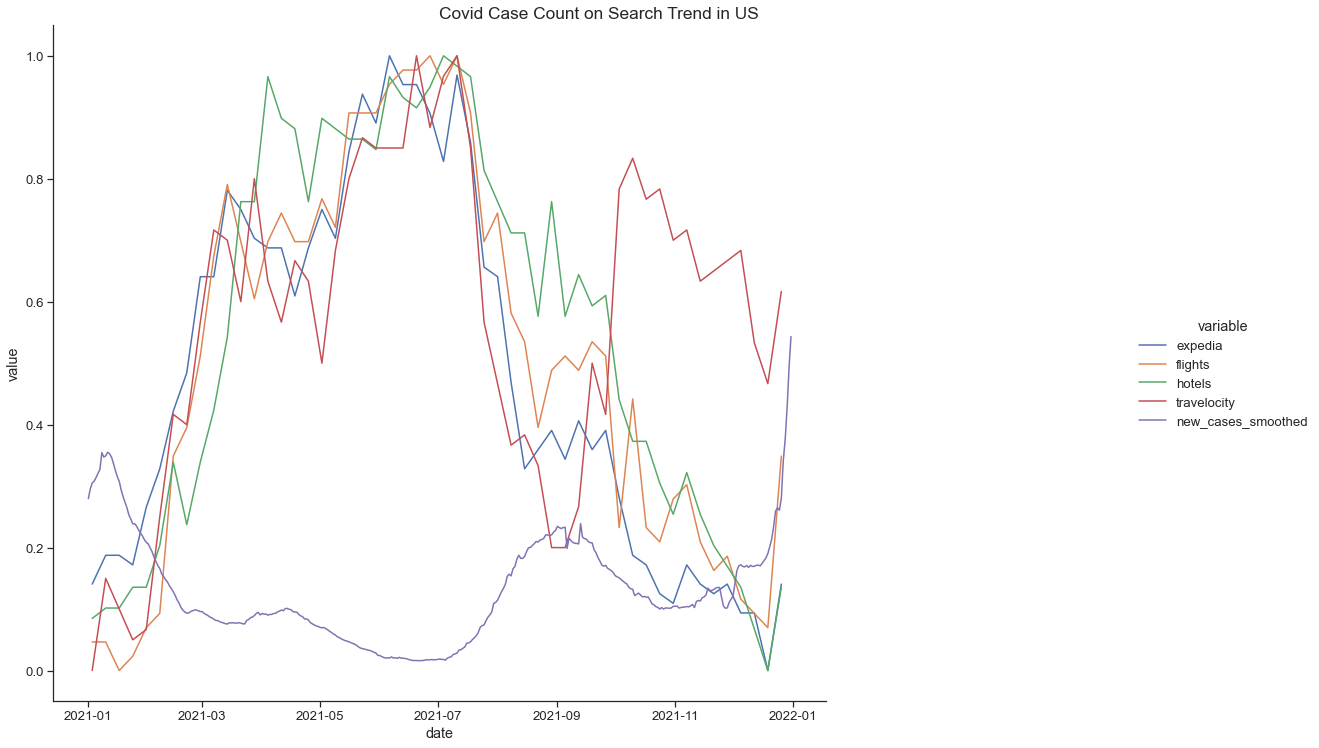

In [31]:
merged = pd.merge(search_trend_norm_us, covid_case_norm_us, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
plot_combined(merged, 'Covid Case Count on Search Trend in US')

## Visualizing Covid-19 Impact on US Travel Demand by TSA Checkpoint

In [32]:
# read the dataset
import requests

url = 'https://www.tsa.gov/coronavirus/passenger-throughput'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}
req = requests.get(url, headers=header)
tsa_raw = pd.read_html(req.text)[0]
tsa_raw.head()

,Date,2022,2021,2020,2019
0,1/23/2022,1648529.0,838116,2136584,1991328
1,1/22/2022,1241792.0,603527,1645196,1763884
2,1/21/2022,1514369.0,755028,2145063,1804629
3,1/20/2022,1471161.0,728978,2100401,2179066
4,1/19/2022,1201583.0,542338,1801444,1776235


In [33]:
def manipulate_tsa(df: DataFrame) -> DataFrame:
    """
    we want to compare the number reported in each day of the year
    the year is not important here
    sort the rows by the date
    """
    df['Date'] = pd.to_datetime(df['Date'])
    df['Date'] = df['Date'].apply(lambda date: date if date.year < 2022 else date.replace(year=2021))
    df = df.sort_values(by=['Date'])
    df.columns = ['date', '2022', '2021', '2020', '2019']
    return df


tsa = manipulate_tsa(tsa_raw)

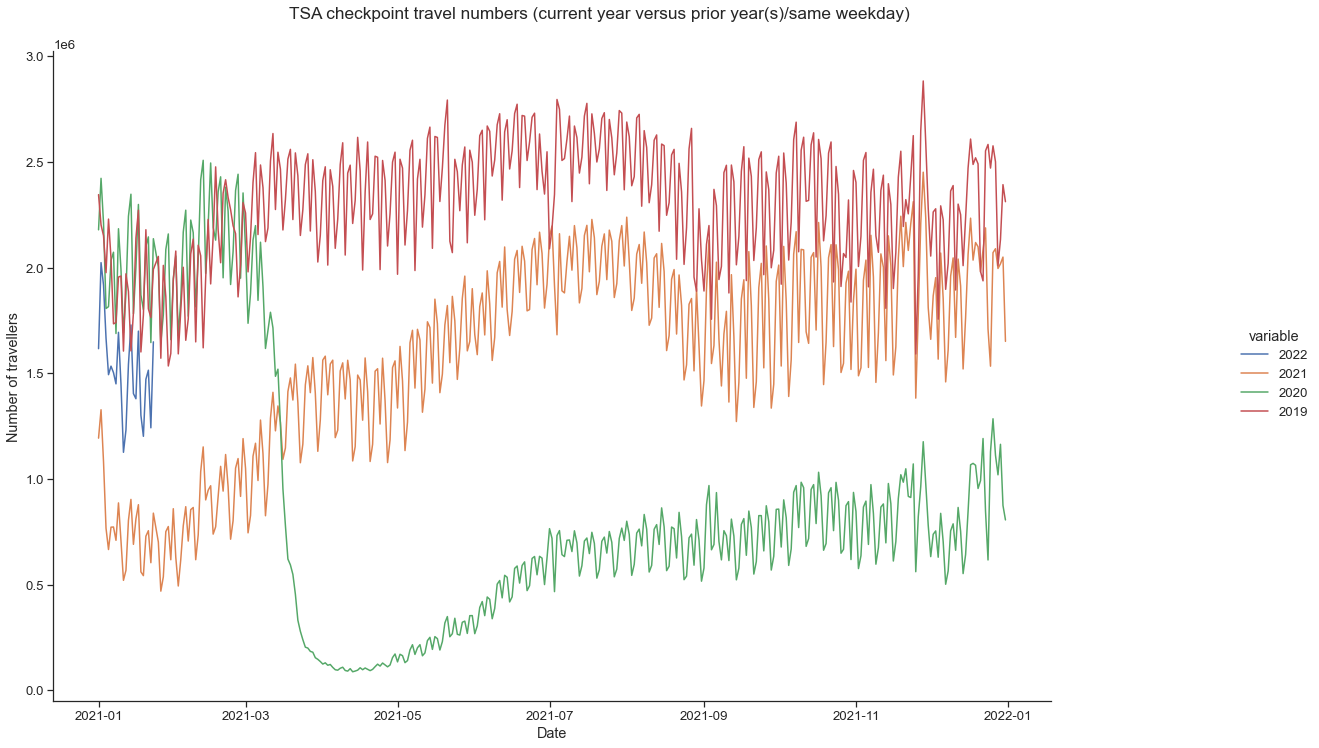

In [34]:
def plot_tsa(df: DataFrame, title, y_label='Number of travellers', x_label='Date', width=20, height=11) -> FacetGrid:
    ax = sns.relplot(x="date", y="value", hue='variable', kind='line', data=df)
    ax.fig.set_figwidth(width)
    ax.fig.set_figheight(height)
    ax.fig.suptitle(title)
    ax.set_ylabels(y_label)
    ax.set_xlabels(x_label)
    return ax


plot_tsa(melt_by_date(tsa), 'TSA checkpoint travel numbers (current year versus prior year(s)/same weekday)')

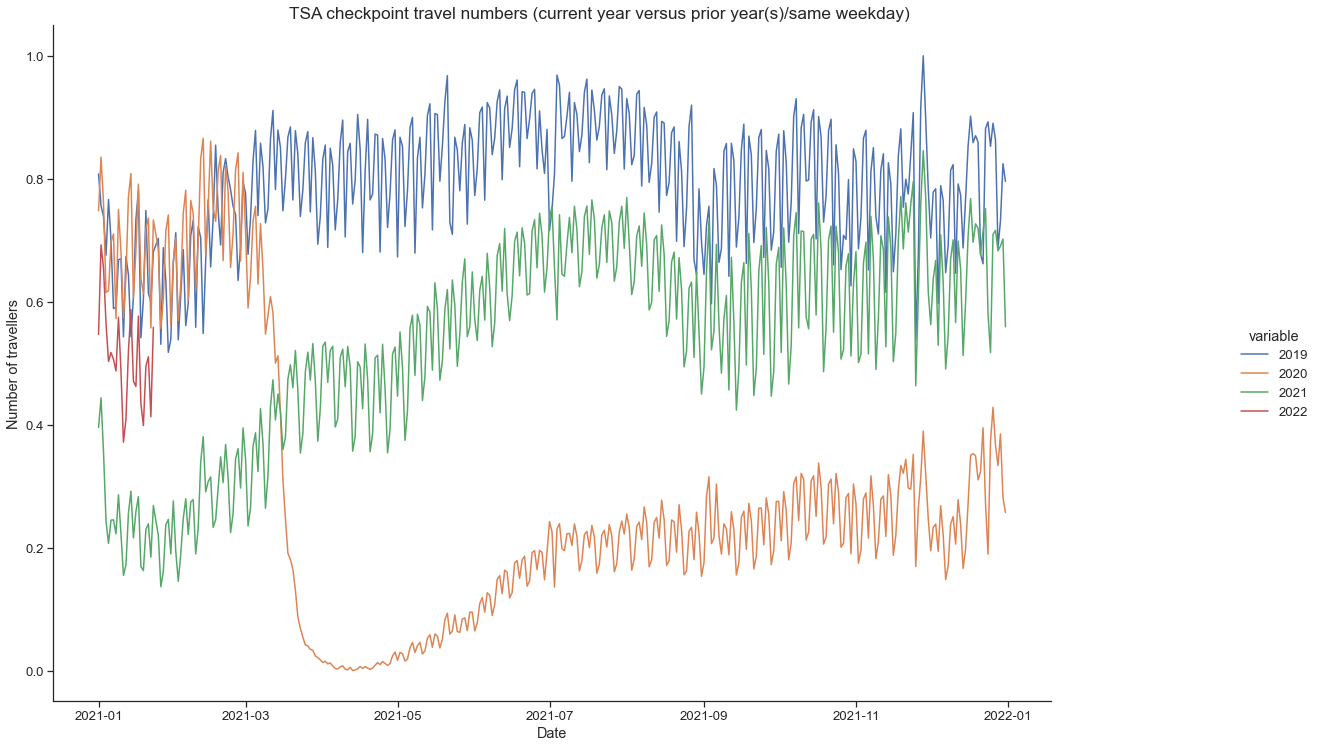

In [35]:
# normalize the data
def normalize_tsa(df: DataFrame) -> DataFrame:
    """
    Min-max normalization of the tsa data
    """
    temp = melt_by_date(df)
    df_norm = temp.iloc[:, 2:].apply(min_max_normalize, axis=0)
    df_norm['date'] = temp['date']
    df_norm['variable'] = temp['variable']
    df_norm = df_norm.set_index('date')
    df_norm = df_norm.pivot(columns='variable')
    df_norm = df_norm.reset_index()
    df_norm.columns = df_norm.columns.droplevel()
    df_norm.index.name = None
    df_norm.columns = ['date', '2019', '2020', '2021', '2022']
    return df_norm


tsa_norm = normalize_tsa(tsa)
plot_tsa(melt_by_date(tsa_norm), 'TSA checkpoint travel numbers (current year versus prior year(s)/same weekday)')

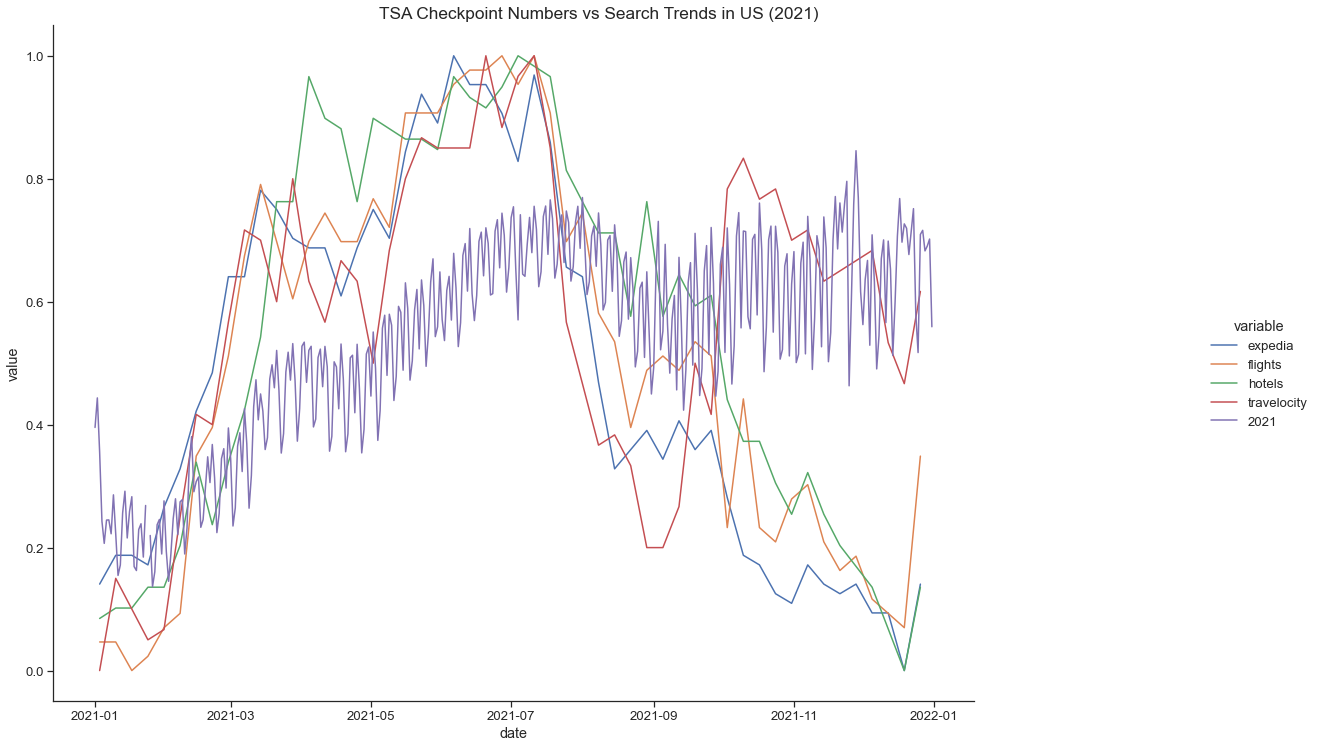

In [36]:
tsa_norm = tsa_norm[['date', '2021']]
merged = pd.merge(search_trend_norm_us, tsa_norm, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
plot_combined(merged, 'TSA Checkpoint Numbers vs Search Trends in US (2021)')

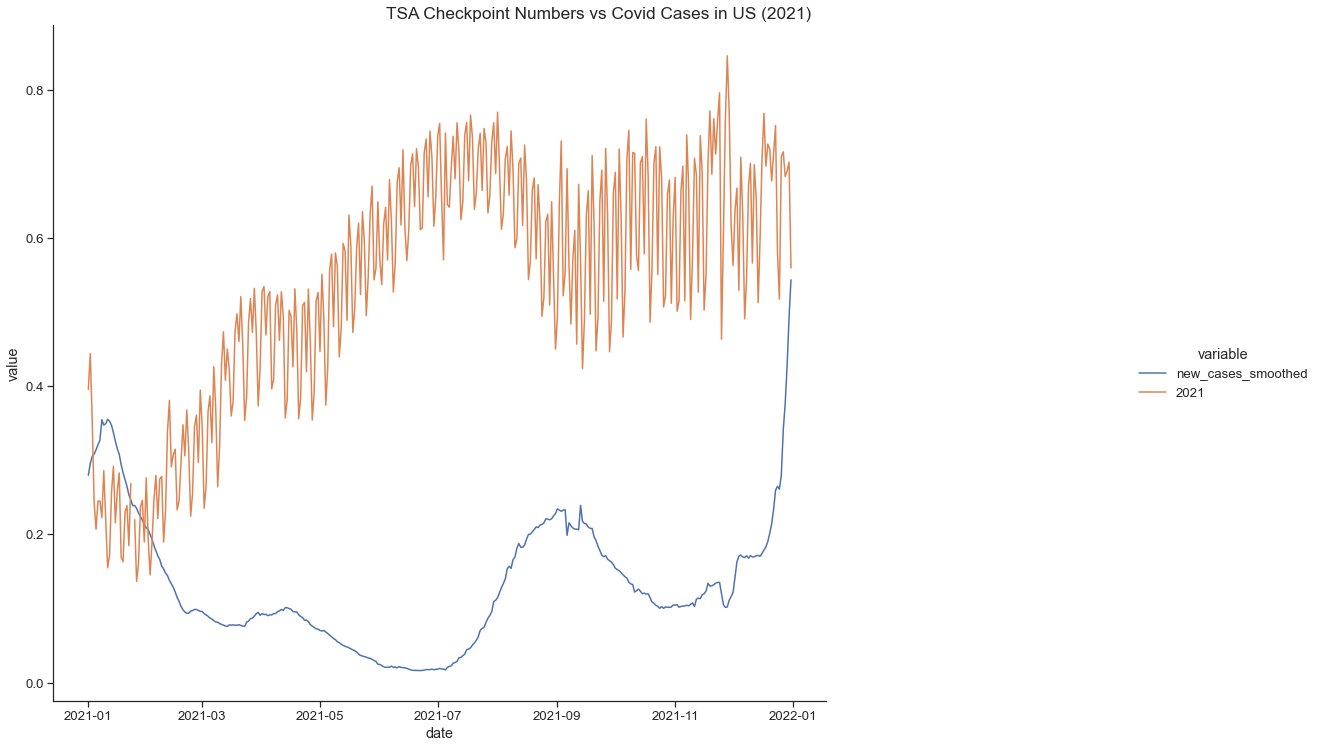

In [37]:
tsa_norm = tsa_norm[['date', '2021']]
merged = pd.merge(covid_case_norm_us, tsa_norm, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
plot_combined(merged, 'TSA Checkpoint Numbers vs Covid Cases in US (2021)')

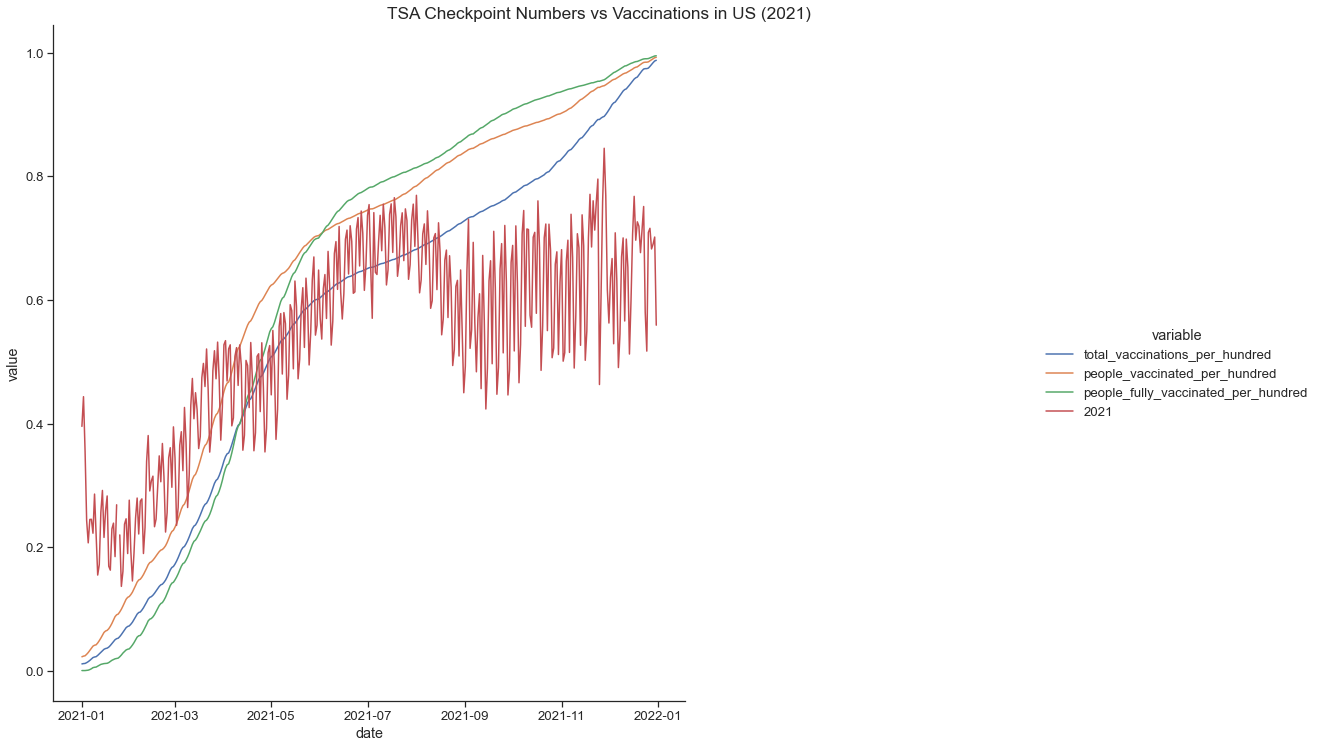

In [38]:
tsa_norm = tsa_norm[['date', '2021']]
merged = pd.merge(covid_vac_norm_us, tsa_norm, on='date', how='outer')
merged = merged.melt(id_vars=['date'])
plot_combined(merged, 'TSA Checkpoint Numbers vs Vaccinations in US (2021)')

# Analysis

## Correlations between Thailand's Search Trends and People Vaccinated in 2021
## Analysis using cross-correlation between timeseries

In [39]:
# shift the search trend dataframe by the lag period
lag_period_days = 28
search_trend_norm_shift_th = search_trend_norm_th.copy()
search_trend_norm_shift_th['date'] = search_trend_norm_th['date'].apply(lambda x: x - pd.offsets.Day(lag_period_days))
search_trend_norm_shift_th = search_trend_norm_shift_th[search_trend_norm_shift_th['date'] >= covid_vac_norm_th.iloc[0]['date']]

In [40]:
# time-adjusted correlations between vaccination and search trend timeseries until the interests reach 1
pd.merge(search_trend_norm_shift_th, covid_vac_norm_th, on='date', how='outer').corr(method='spearman')

,agoda,huahin,car_rental,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
agoda,1.000000,0.870600,0.870971,0.669362,0.669357,0.669450
huahin,0.870600,1.000000,0.832510,0.661361,0.661356,0.661359
car_rental,0.870971,0.832510,1.000000,0.720842,0.720837,0.720921
total_vaccinations_per_hundred,0.669362,0.661361,0.720842,1.000000,0.999999,0.999992
people_vaccinated_per_hundred,0.669357,0.661356,0.720837,0.999999,1.000000,0.999993
people_fully_vaccinated_per_hundred,0.669450,0.661359,0.720921,0.999992,0.999993,1.000000


Text(0.63, 0.29, 'Vaccinations increase')

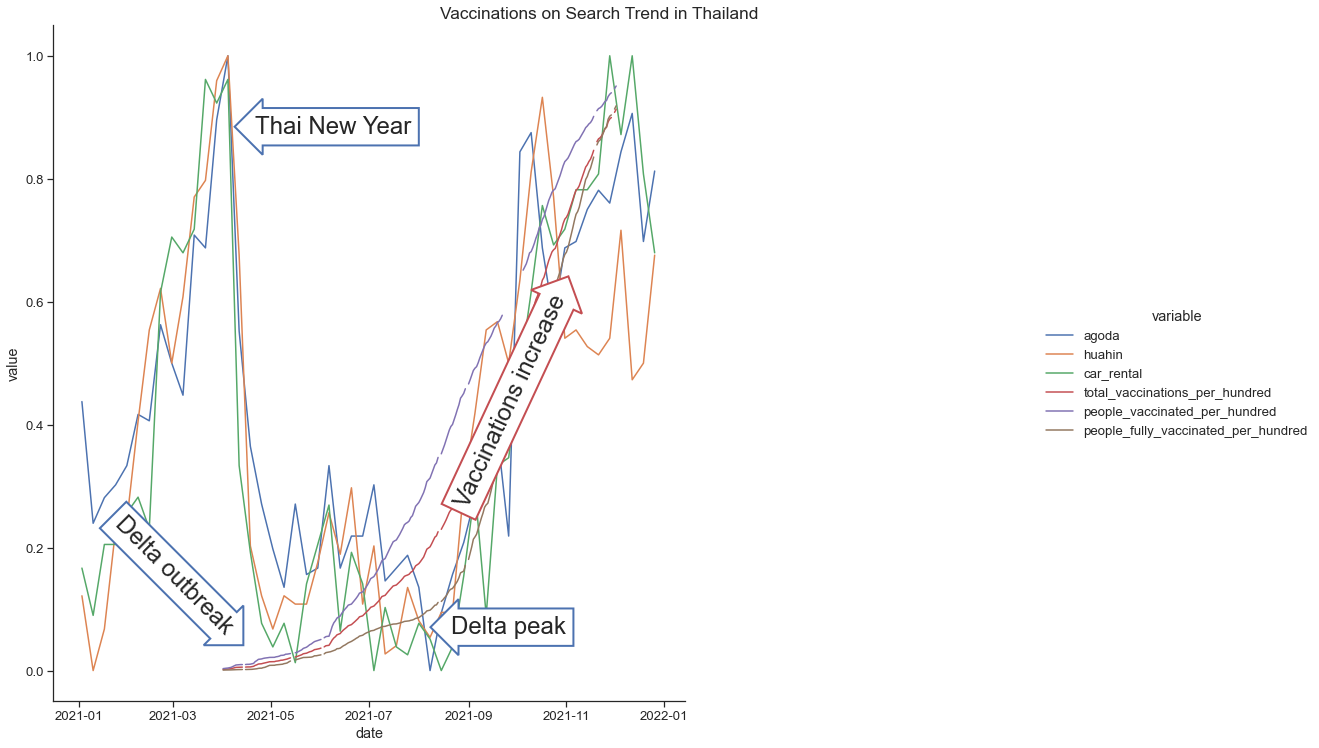

In [218]:
merged = pd.merge(search_trend_norm_th, covid_vac_norm_th, on='date', how='outer')
plot_combined(melt_by_date(merged), 'Vaccinations on Search Trend in Thailand')
ax = plt.gca()

# Thai new year holidays (April 13)
ax.text(0.32, 0.84, 'Thai New Year', transform=ax.transAxes, 
        fontsize=24, 
        bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2))

# Start of the Delta variant outbreak (April 20)
ax.text(0.09, 0.10, 'Delta outbreak', transform=ax.transAxes, 
        fontsize=24, rotation=-45,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="b", lw=2))

# Peak of the Delta variant outbreak (August 20)
ax.text(0.63, 0.10, 'Delta peak', transform=ax.transAxes, 
        fontsize=24, rotation=0,
        bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2))

# Correlation
ax.text(0.63, 0.29, 'Vaccinations increase', transform=ax.transAxes, 
        fontsize=24, rotation=65,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="r", lw=2))

## Correlations between Thailand's Search Trends and Covid Cases Reported

In [183]:
cutoff_date = pd.Timestamp('2021-01-01')
merged = pd.merge(search_trend_norm_th[search_trend_norm_th['date'] >= cutoff_date],
                  covid_case_norm_th[covid_case_norm_th['date'] >= cutoff_date], on='date', how='outer')
merged.corr(method='spearman')

,agoda,huahin,car_rental,new_cases_smoothed
agoda,1.000000,0.846948,0.905565,-0.317876
huahin,0.846948,1.000000,0.840145,-0.205303
car_rental,0.905565,0.840145,1.000000,-0.291101
new_cases_smoothed,-0.317876,-0.205303,-0.291101,1.000000


Text(0.63, 0.1, 'Delta peak')

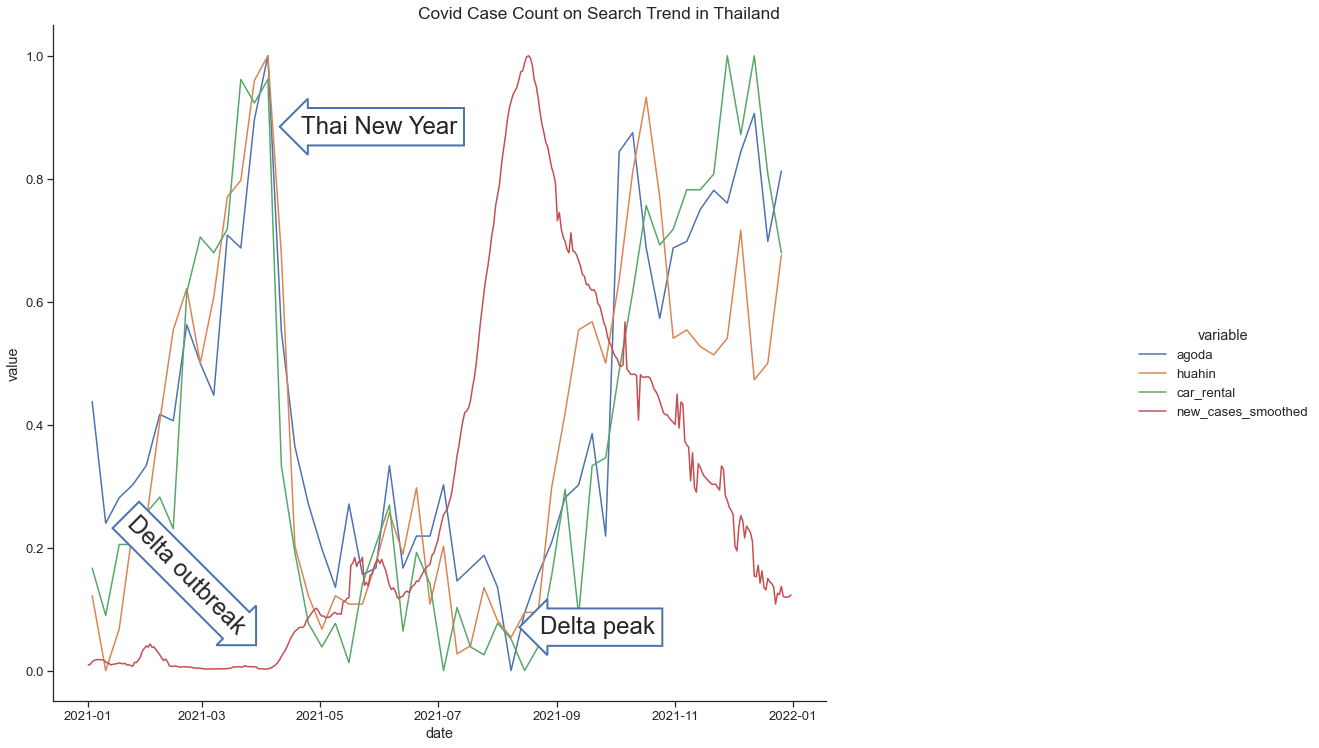

In [184]:
plot_combined(melt_by_date(merged), 'Covid Case Count on Search Trend in Thailand')
ax = plt.gca()

# Thai new year holidays (April 13)
ax.text(0.32, 0.84, 'Thai New Year', transform=ax.transAxes, 
        fontsize=24, 
        bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2))

# Start of the Delta variant outbreak (April 20)
ax.text(0.09, 0.10, 'Delta outbreak', transform=ax.transAxes, 
        fontsize=24, rotation=-45,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="b", lw=2))

# Peak of the Delta variant outbreak (August 20)
ax.text(0.63, 0.10, 'Delta peak', transform=ax.transAxes, 
        fontsize=24, rotation=0,
        bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2))

Stronger inverse relationship as Delta variant hits after June

## Correlations between US Search Trends and Vaccinations in 2021

In [230]:
# shift the search trend dataframe by the lag period
lag_period_days = 28
search_trend_norm_shift_us = search_trend_norm_us.copy()
search_trend_norm_shift_us['date'] = search_trend_norm_us['date'].apply(lambda x: x - pd.offsets.Day(lag_period_days))
search_trend_norm_shift_us = search_trend_norm_shift_us[search_trend_norm_shift_us['date'] >= covid_vac_norm_us.iloc[0]['date']]

In [233]:
cutoff_date = pd.Timestamp('2021-06-15')
merged = pd.merge(search_trend_norm_shift_us[search_trend_norm_shift_us['date'] < cutoff_date], 
                  covid_vac_norm_us[covid_vac_norm_us['date'] < cutoff_date], 
                  on='date', how='outer')
merged.corr(method='spearman')

,expedia,flights,hotels,travelocity,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
expedia,1.000000,0.928751,0.735158,0.866432,0.875389,0.875389,0.875386
flights,0.928751,1.000000,0.834641,0.866861,0.944131,0.944131,0.944128
hotels,0.735158,0.834641,1.000000,0.721369,0.888670,0.888670,0.888672
travelocity,0.866432,0.866861,0.721369,1.000000,0.871074,0.871074,0.871071
total_vaccinations_per_hundred,0.875389,0.944131,0.888670,0.871074,1.000000,1.000000,0.999997
people_vaccinated_per_hundred,0.875389,0.944131,0.888670,0.871074,1.000000,1.000000,0.999997
people_fully_vaccinated_per_hundred,0.875386,0.944128,0.888672,0.871071,0.999997,0.999997,1.000000


Text(0.43, 0.5, 'Vaccinations increase')

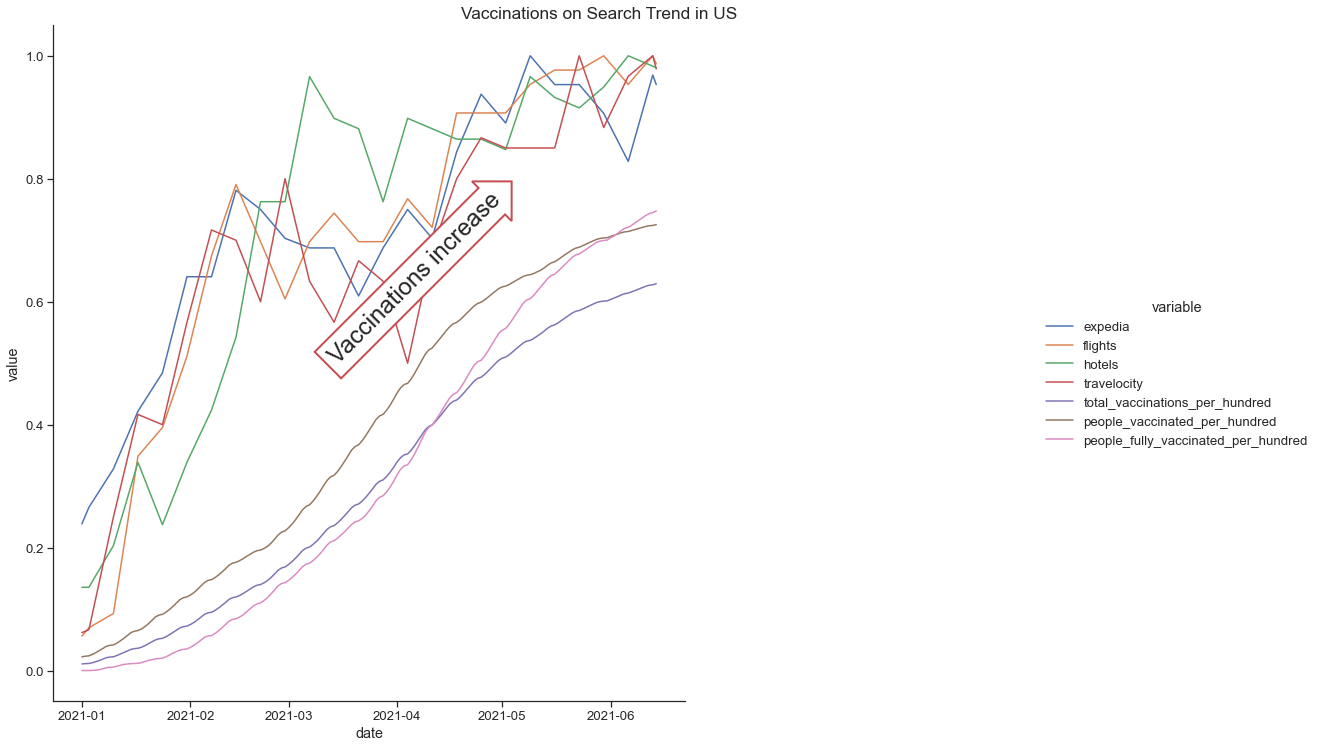

In [237]:
plot_combined(merged.melt(id_vars=['date']), 'Vaccinations on Search Trend in US')
ax = plt.gca()

# Correlation
ax.text(0.43, 0.50, 'Vaccinations increase', transform=ax.transAxes, 
        fontsize=24, rotation=45,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="r", lw=2))

## Correlation between US Covid Cases and Search Trends in 2021

In [246]:
merged = pd.merge(search_trend_norm_us, covid_case_norm_us, on='date', how='outer')
merged.corr(method='spearman')

,expedia,flights,hotels,travelocity,new_cases_smoothed
expedia,1.000000,0.927511,0.883634,0.479404,-0.790849
flights,0.927511,1.000000,0.938338,0.613566,-0.832984
hotels,0.883634,0.938338,1.000000,0.548201,-0.749812
travelocity,0.479404,0.613566,0.548201,1.000000,-0.815261
new_cases_smoothed,-0.790849,-0.832984,-0.749812,-0.815261,1.000000


Text(0.7, 0.25, 'Delta peak')

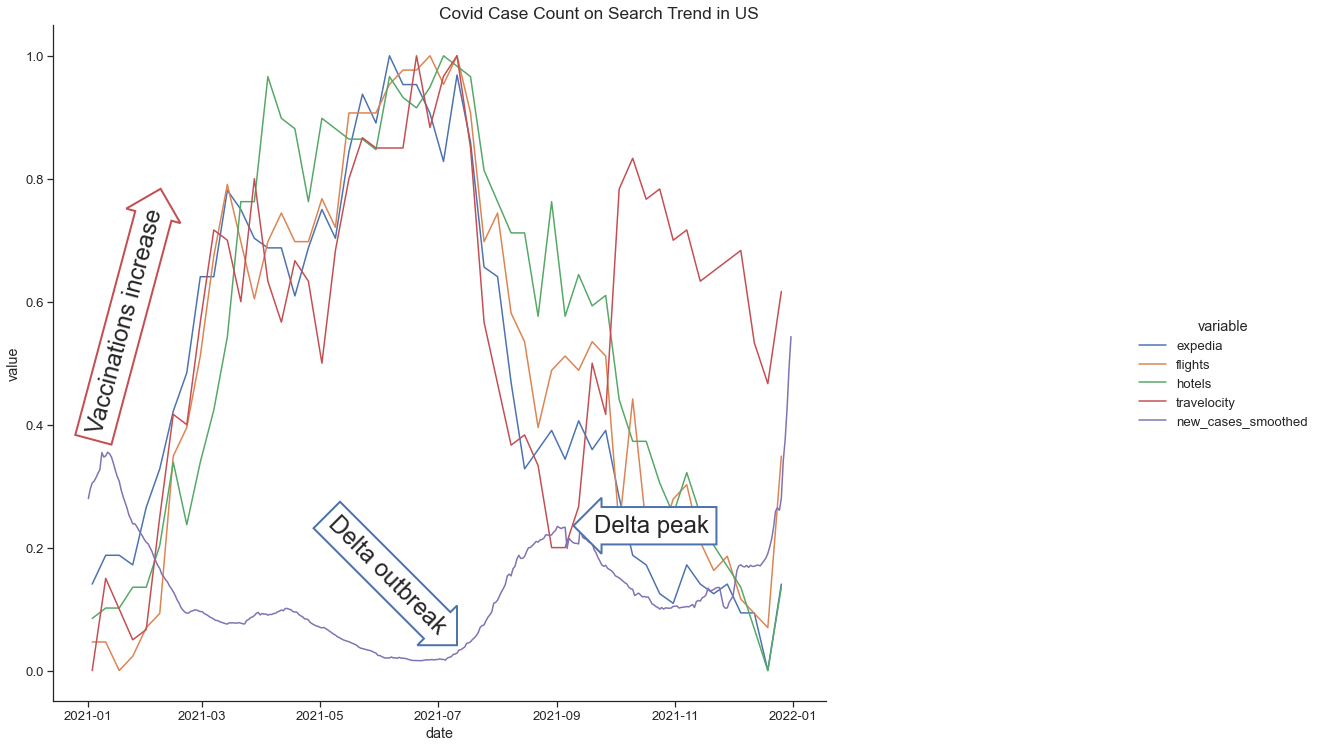

In [274]:
plot_combined(merged.melt(id_vars=['date']), 'Covid Case Count on Search Trend in US')
ax = plt.gca()

# Vaccinations
ax.text(0.04, 0.40, 'Vaccinations increase', transform=ax.transAxes, 
        fontsize=24, rotation=75,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="r", lw=2))

# Start of the Delta variant outbreak (April 20)
ax.text(0.35, 0.10, 'Delta outbreak', transform=ax.transAxes, 
        fontsize=24, rotation=-45,
        bbox=dict(boxstyle="rarrow,pad=0.3", fc="white", ec="b", lw=2))

# Peak of the Delta variant outbreak (August 20)
ax.text(0.70, 0.25, 'Delta peak', transform=ax.transAxes, 
        fontsize=24, rotation=0,
        bbox=dict(boxstyle="larrow,pad=0.3", fc="white", ec="b", lw=2))

## Correlation between TSA Traveller Number and Covid Cases

In [284]:
tsa_norm = tsa_norm[['date', '2021']]
merged = pd.merge(covid_case_norm_us, tsa_norm, on='date', how='outer')
merged.corr(method='spearman')

,new_cases_smoothed,2021
new_cases_smoothed,1.00000,-0.18476
2021,-0.18476,1.00000


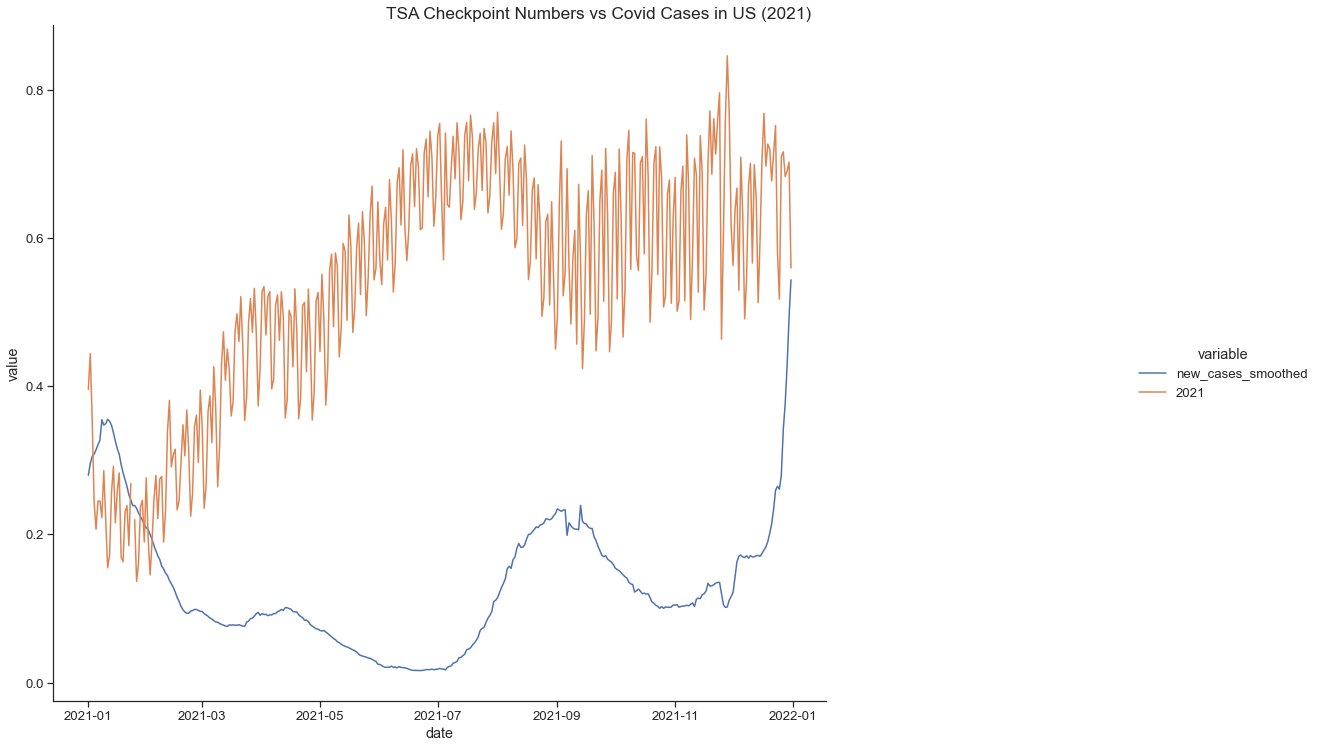

In [285]:
plot_combined(merged.melt(id_vars=['date']), 'TSA Checkpoint Numbers vs Covid Cases in US (2021)')

## Correlation between TSA Traveller Number and Vaccinations

In [286]:
tsa_norm = tsa_norm[['date', '2021']]
merged = pd.merge(covid_vac_norm_us, tsa_norm, on='date', how='outer')
merged.corr(method='spearman')

,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,2021
total_vaccinations_per_hundred,1.000000,1.000000,1.000000,0.708756
people_vaccinated_per_hundred,1.000000,1.000000,1.000000,0.708803
people_fully_vaccinated_per_hundred,1.000000,1.000000,1.000000,0.708801
2021,0.708756,0.708803,0.708801,1.000000


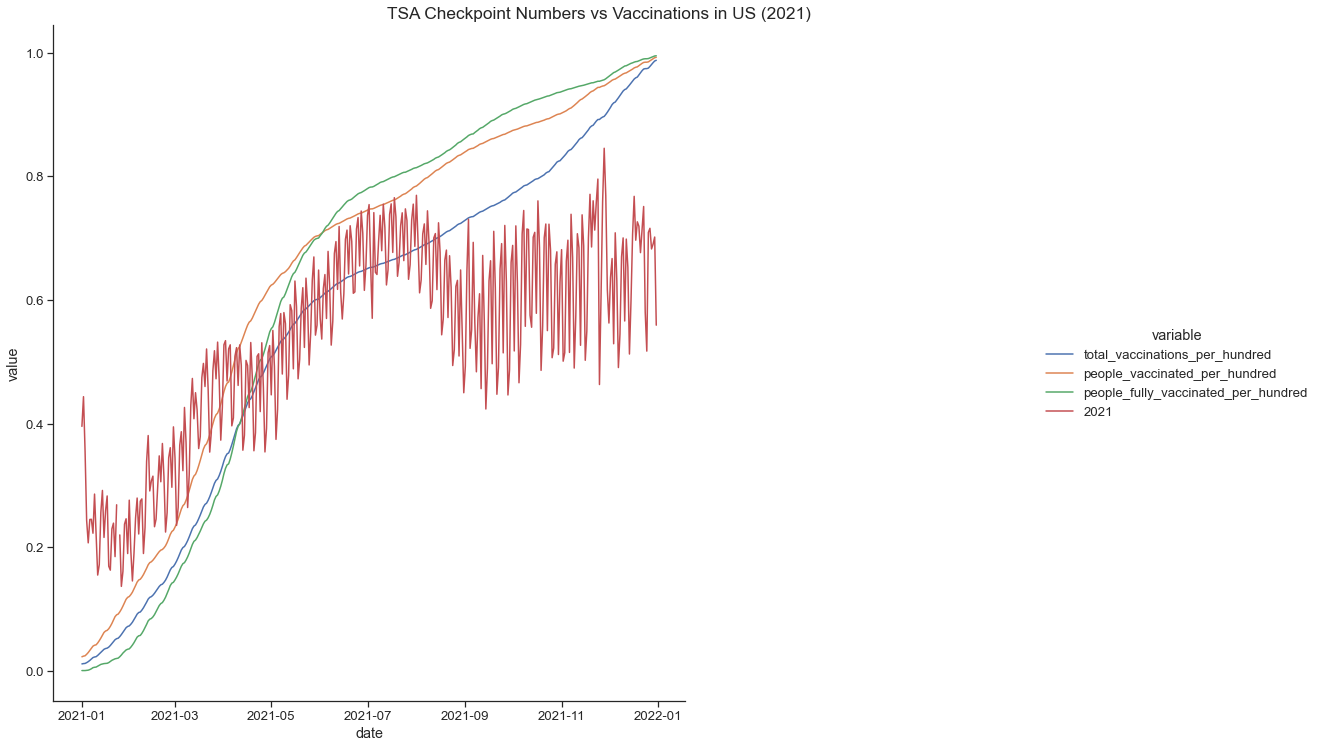

In [287]:
plot_combined(merged.melt(id_vars=['date']), 'TSA Checkpoint Numbers vs Vaccinations in US (2021)')